<p>
  <b>AI Lab: Deep Learning for Computer Vision</b><br>
  <b><a href="https://www.wqu.edu/">WorldQuant University</a></b>
</p>

<div class="alert alert-success" role="alert">
  <p>
    <center><b>Usage Guidelines</b></center>
  </p>
  <p>
    This file is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International</a>.
  </p>
  <p>
    You <b>can</b>:
    <ul>
      <li><span style="color: green">✓</span> Download this file</li>
      <li><span style="color: green">✓</span> Post this file in public repositories</li>
    </ul>
    You <b>must always</b>:
    <ul>
      <li><span style="color: green">✓</span> Give credit to <a href="https://www.wqu.edu/">WorldQuant University</a> for the creation of this file</li>
      <li><span style="color: green">✓</span> Provide a <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">link to the license</a></li>
    </ul>
    You <b>cannot</b>:
    <ul>
      <li><span style="color: red">✗</span> Create derivatives or adaptations of this file</li>
      <li><span style="color: red">✗</span> Use this file for commercial purposes</li>
    </ul>
  </p>
  <p>
    Failure to follow these guidelines is a violation of your terms of service and could lead to your expulsion from WorldQuant University and the revocation your certificate.
  </p>
</div>

## 🌱 Cassava Crop Disease Classifier 🌿  

##### 🚀 **Summary**

In this lesson, we’ll create a **classifier model** 🧠 that predicts **crop diseases** 🌾 on cassava plants using images from Uganda. We'll use **Transfer Learning** 🔄, a powerful technique that allows us to fine-tune a pre-trained model for our specific task. This saves time ⏳ and improves performance 📈. Along the way, we’ll explore **Callbacks** 🛠️—handy tools to optimize and customize the training process.  


##### 🌟 **Key Objectives**  
1. **📂 Read and Process Data:**  
   Load and explore data with multiple classes, then prepare it for training.  

2. **🛠️ Transform Data for Training:**  
   Preprocess cassava images to make them ready for modeling.  

3. **🚀 Transfer Learning Implementation:**  
   Train a **classifier model** using a pre-trained neural network for cassava images.  

4. **💡 Optimize Training with Callbacks:**  
   - **📉 Learning Rate Scheduling:** Dynamically adjust the learning rate during training for smoother optimization.  
   - **💾 Checkpointing:** Save the best version of the model during training so we don’t lose progress.  
   - **⏹️ Early Stopping:** Stop training early if the model stops improving to save time and prevent overfitting.  

5. **🎯 Prepare a Competition Submission:**  
   Format the model's predictions on the test set into the required structure for submission.  


##### ✨ **New Terms**

1. **🛠️ Callbacks:**  
   Customizable tools to fine-tune the model's behavior during training (e.g., monitoring performance or adjusting parameters).  

2. **📉 Learning Rate Scheduling:**  
   A method to gradually reduce the learning rate during training for better model convergence.  

3. **💾 Checkpointing:**  
   Automatically save your model at its **best performance**, so you can always come back to it.  

4. **⏹️ Early Stopping:**  
   Stop training early if validation performance stops improving—this saves time and avoids overfitting!  


By the end of this lesson, you’ll have hands-on experience with **Transfer Learning** 🔄, **Callbacks** 🛠️, and preparing your model for a **competition-ready submission** 🎯.

### Setup and Data Preparation

Before diving into the model, let's set up our environment and prepare the data. We'll first load the necessary libraries and print out library versions.

In [1]:
# Necessary import
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import torch
import torch.nn as nn
import torch.optim as optim
import torchinfo
import torchvision

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, random_split
from torchinfo import summary
from torchvision import datasets, models, transforms
from tqdm import tqdm

In [2]:
# Libraries versions
print("torch version : ", torch.__version__)
print("torchvision version : ", torchvision.__version__)
print("torchinfo version : ", torchinfo.__version__)
print("numpy version : ", np.__version__)
print("matplotlib version : ", matplotlib.__version__)

# Python version
!python --version

torch version :  2.2.2+cu121
torchvision version :  0.17.2+cu121
torchinfo version :  1.8.0
numpy version :  1.26.3
matplotlib version :  3.9.2
Python 3.11.0


Let's also check if GPUs are available and set our device accordingly.

In [3]:
# Check GPU availability
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

# Output GPU device
print(f"Using {device} device.")

Using cuda device.


The data is in the `data_p2` directory within which is the `data_undersampled` directory. In that folder we have the `train` subdirectory that contains the training data.

**Task 2.5.1:** Assign `data_dir` the path to the training data using `os.path.join`.

In [4]:
# Set data directory path
data_dir = os.path.join("data_p2", "data_undersampled", "train")

print("Data Directory:", data_dir)

Data Directory: data_p2/data_undersampled/train


You may remember that images from each class are contained in separate subdirectories within `data_dir`, where the name of each subdirectory is the name of the class.

**Task 2.5.2:** Create a list of class names in this data using `os.listdir`.

In [5]:
# Get target classes
classes = os.listdir(data_dir)

print("List of classes:", classes)

List of classes: ['cassava-healthy', 'cassava-mosaic-disease-cmd', 'cassava-brown-streak-disease-cbsd', 'cassava-green-mottle-cgm', 'cassava-bacterial-blight-cbb']


As in the previous lessons, we'll standardize the images using the following set of transformations:

- Convert any grayscale images to RGB format with a custom class
- Resize the image, so that they're all the same size (we chose $224$ x $224$)
- Convert the image to a Tensor of pixel values
- Normalize the data

Here's the custom transformation that we've used before which converts images to RGB format:

In [6]:
# Callable class to convert images to color
class ConvertToRGB(object):
    def __call__(self, img):
        # if image not in color
        if img.mode != "RGB":
            # convert to color
            img = img.convert("RGB")
        # return converted image
        return img

Now let's make the transformation pipeline. In the normalization step, use the `mean` and `std` values from our previous lesson.

**Task 2.5.3:** Create the transformation pipeline using `transforms.Compose` from `torchvision` package. Follow what we did in the previous lessons.

In [7]:
# Set mean and std for this notebook
mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

In [8]:
# Set of images transformations
transform_normalized = transforms.Compose([
    ConvertToRGB(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

print(type(transform_normalized))
print("----------------")
print(transform_normalized)

<class 'torchvision.transforms.transforms.Compose'>
----------------
Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


Let's create the dataset and apply our transformations.

**Task 2.5.4:** Make a dataset using `ImageFolder` from `datasets` and make sure to apply `transform_normalized` transformation pipeline. Then print the length of the dataset.

In [9]:
# Create normalized data set
normalized_dataset = datasets.ImageFolder(root = data_dir, transform = transform_normalized)

print('Length of dataset:', len(normalized_dataset))

Length of dataset: 7615


### Making a train/validation split

As usual, we'll divide our data into two parts. One part is for training the model, the other part is for evaluating it on unseen images.

**Task 2.5.5:** Use `random_split` to create a 80/20 split (training dataset should have 80% of the data, validation dataset should have 20% of the data).

<div class="alert alert-info" role="alert">
    <p><b>About random number generators</b></p>
<p>The following cell adds a <code>generator=g</code> line of code that is not present in the video. This is something we have added to make sure you always get the same results in your predictions. Please don't change it or remove it.
</p>
</div>

In [10]:
# Important, don't change this!
g = torch.Generator() # Image generator initialization
g.manual_seed(42) # seed for reproducibility

# Train - Validation Split
train_dataset, val_dataset = random_split(normalized_dataset, [0.8, 0.2] , generator = g)

# Print data sets lengths
print("Length of training dataset:", len(train_dataset))
print("Length of validation dataset:", len(val_dataset))

# Data set ratio among the original data set
percent_train = np.round(100 * len(train_dataset) / len(normalized_dataset), 2) # train
percent_val = np.round(100 * len(val_dataset) / len(normalized_dataset), 2) # validation

print(f"Train data is {percent_train}% of full data")
print(f"Validation data is {percent_val}% of full data")

Length of training dataset: 6092
Length of validation dataset: 1523
Train data is 80.0% of full data
Validation data is 20.0% of full data


Let's again check how the observations are distributed across classes. We'll reuse the `class_counts` function from `training.py` that we used previously. We want to check the distribution of the training and the validation data.

**Task 2.5.6:** Use `class_counts` function on the `train_dataset` and visualize the results with a bar chart.

  0%|          | 0/6092 [00:00<?, ?it/s]

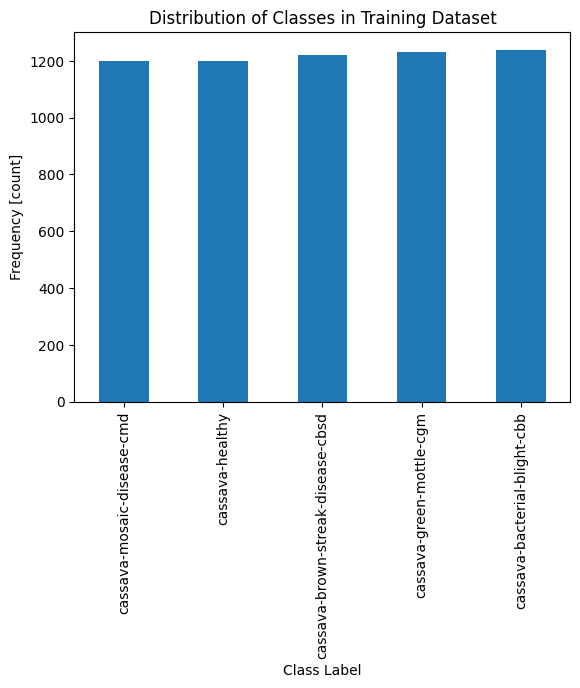

In [11]:
# import for target classes distribution
from training import class_counts

# Get the target distribution for the training data set
train_counts = class_counts(train_dataset)

# Make a bar chart from the function output
train_counts.sort_values().plot(kind = "bar")
# Add axis labels and title
plt.xlabel("Class Label")
plt.ylabel("Frequency [count]")
plt.title("Distribution of Classes in Training Dataset");

**Task 2.5.7:** Use the `class_counts` function on the validation split. Make sure to again visualize the results with a bar chart.

  0%|          | 0/1523 [00:00<?, ?it/s]

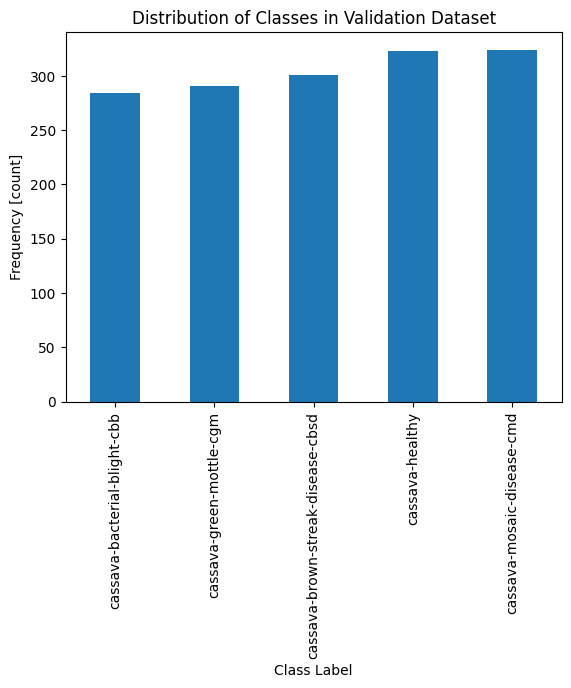

In [12]:
# Get the target distribution for the validation data set
val_counts = class_counts(val_dataset)

# Make a bar chart from the function output
val_counts.sort_values().plot(kind = "bar")
# Add axis labels and title
plt.xlabel("Class Label")
plt.ylabel("Frequency [count]")
plt.title("Distribution of Classes in Validation Dataset");

Now let's create `DataLoader` objects. We'll use a batch size of 32 and create one `DataLoader` for training and another for validation data. Remember that in training we want to shuffle the data after each epoch and in validation we don't.

**Task 2.5.8:** Create the training loader (with shuffling on) and the validation loader (with shuffling off).

In [13]:
# Set the batch size
batch_size = 32

# Get the train data loader
train_loader = DataLoader(train_dataset, batch_size, shuffle = True)
# Get the validation data loader
val_loader = DataLoader(val_dataset, batch_size)

print(type(train_loader))
print(type(val_loader))

<class 'torch.utils.data.dataloader.DataLoader'>
<class 'torch.utils.data.dataloader.DataLoader'>


### Model Selection for Transfer Learning

When we're using Transfer Learning, choosing the right pre-trained model is crucial. We'll select the same model as in the previous lesson. This model has been trained on a large and diverse dataset, ensuring it has learned features that are broadly applicable to various tasks, including ours.

**Task 2.5.9:** Define a `resnet50` model in the same way we defined it in the previous lesson.

In [14]:
# Load pre-trained model
model = models.resnet50(weights = models.ResNet50_Weights.DEFAULT)

print(model) # model structure

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In Transfer Learning, we don't want to tweak the model weights when we train the model on our data. So let's make sure the weights are fixed! 
 

**Task 2.5.10:** Fix the parameters of the model such that they'll not be updated once we train the model on our task. Remember how we did this in the previous lesson?

In [15]:
# Freeze the models weights
for params in model.parameters():
    params.requires_grad = False # no gradient
    
print(model) # model structure

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Same as we did before, we now want to change the output layer of the model (layer `model.fc`). We want to replace it with a dense layer and an output layer. 

But we need to know how many features will be going into the dense layer that we want to add. This means we should first compute the number of features going into the last layer of the original model.

**Task 2.5.11:** Compute the number of features going into the last layer of the original model.

In [16]:
# Get the number of features going into the last layer of the pre-trained resnet 50
in_feat = model.fc.in_features

print(in_feat)

2048


Well done! Now we can change the last layer (layer `model.fc`). We want to change it to:
- a dense layer with 256 neurons
- followed by ReLU activation
- then add `p=0.5` of Dropout
- followed by the output layer with 5 neurons (because our data has 5 classes)

**Task 2.5.12:** Fill in the missing parts of code below that changes the last layer of the original model.

In [17]:
# Initialize the neural network that will serve as new last layer
modified_last_layer = nn.Sequential()
# Add a dense layer with 256 nodes
modified_last_layer.append(nn.Linear(in_feat, 256))
# Create and add an activation function
relu = nn.ReLU() # relu activation
modified_last_layer.append(relu) # adding the activation
# Add some drop out for regularization
modified_last_layer.append(nn.Dropout(p = 0.5))
# Create an output layer
linear = nn.Linear(256, 5)
modified_last_layer.append(linear) # adding the output layer
# Update the last layer of the original model
model.fc = modified_last_layer

print(model) # model structure

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Observe how the last layer of the model is now different and exactly what we wanted.

We're ready to start fitting!

### Training the Model

As always, before we start training, we need to define the loss and what optimizer we'll use. For loss function we'll go with cross entropy. For the optimizer we'll choose the Adam optimizer as we've done before.

**Task 2.5.13:** Define cross-entropy as the loss function and set Adam optimizer to be the optimizer. You can use the default learning rate and `weight_decay=1e-4`.

In [18]:
# Set the loss function
loss_fn = nn.CrossEntropyLoss()
# Set Adam optimizer with weight decay
optimizer = optim.Adam(model.parameters(), weight_decay = 1e-4)

print(loss_fn)
print("----------------------")
print(optimizer)

CrossEntropyLoss()
----------------------
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.0001
)


Next let's make sure that we use the GPU that we have at our disposal. 

**Task 2.5.14:** Place our model on `device`. The code we provided below prints out the device that the model is on.

In [19]:
# Place model on device
model.to(device)

print(next(model.parameters()).device) # print model device

cuda:0


Before we continue, let's get more information about our model by calling the `summary` function on the model. You may remember that we've seen this function before. This function requires us to pass in two things: the model itself and the size of input tensors.

**Task 2.5.15:** Complete the `input_size` tuple that we are passing to `summary` function in the code below.

In [20]:
# Set image data size
height, width = 224, 224

# Get model summary
summary(model, input_size = (batch_size, 3, height, width))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [32, 5]                   --
├─Conv2d: 1-1                            [32, 64, 112, 112]        (9,408)
├─BatchNorm2d: 1-2                       [32, 64, 112, 112]        (128)
├─ReLU: 1-3                              [32, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [32, 64, 56, 56]          --
├─Sequential: 1-5                        [32, 256, 56, 56]         --
│    └─Bottleneck: 2-1                   [32, 256, 56, 56]         --
│    │    └─Conv2d: 3-1                  [32, 64, 56, 56]          (4,096)
│    │    └─BatchNorm2d: 3-2             [32, 64, 56, 56]          (128)
│    │    └─ReLU: 3-3                    [32, 64, 56, 56]          --
│    │    └─Conv2d: 3-4                  [32, 64, 56, 56]          (36,864)
│    │    └─BatchNorm2d: 3-5             [32, 64, 56, 56]          (128)
│    │    └─ReLU: 3-6                    [32, 64, 56, 56]   

Among other things, the output of the summary displays the amount of trainable parameters the model has. And it has many! 

While we added Dropout, which helps with preventing overfitting, we'll go further and take another step to make sure we don't overfit. When we fit, we'll check model performance at every epoch and stop fitting when the model stops improving. This brings us to callbacks!

### Training the Model with Callbacks

During the training of our model, we can use various callbacks. Callbacks allow us to customize and control the training process in fine-grained ways. We'll implement three key callbacks:
        
- **Learning Rate Scheduling**: Adjusts the learning rate over time, which can lead to better model performance.
- **Early Stopping**: Halts training when the model's performance stops improving, which prevents overfitting. We'll stop if validation loss doesn't improve for at least 5 epochs.
- **Checkpointing**: Saves the model every time validation loss gets better than in the epoch prior. This allows us to recover the best model once training completes.

In order to use these callbacks, we need to implement them and then update the `train` function. 

For the Learning Rate Scheduling, we'll use `StepLR` from `torch.optim`. The `StepLR` scheduler decays the learning rate by multiplicative factor `gamma` every `step_size` epochs. 

**Task 2.5.16:** Set `step_size` to $4$ and `gamma` factor to $0.2$. The rest of the code creates a `StepLR` Learning Rate Scheduler.

In [21]:
# Period of learning rate decay
step_size = 4
# Multiplicative factor of learning rate decay
gamma = 0.2

# Initialize the learning rate scheduler
scheduler = StepLR(
    optimizer,
    step_size = step_size,
    gamma = gamma,
)

print(type(scheduler)) # scheduler type

<class 'torch.optim.lr_scheduler.StepLR'>


For Early Stopping, we'll create a function `early_stopping` that we'll call from within the `train` function. The `early_stopping` function accepts:
- the current validation loss,
- the best validation loss so far
- the number of epochs since validation loss last improved (counter).

In the function we need to check if validation loss improved. If yes, we reset the counter. If not, we add one to the counter. We also need to check if validation loss hasn't improved in the last 5 epochs. If that is the case, we should set stopping to `True`. 

**Task 2.5.17:** Fill in the missing code in the definition of the `early_stopping` function below.

In [23]:
# Define a function for early-stopping during model training
def early_stopping(validation_loss, best_val_loss, counter):
    """Function that implements Early Stopping
    ---
    validation_loss: current epoch loss during model training
    best_val_loss: current smaller loss recorded during model training
    counter: early-stopping counter, indicates for how many consecutive epochs the loss has not improved
    """
    # Initialize stop as False
    stop = False

    # if the loss has improved 
    if validation_loss < best_val_loss:
        # reset early-stopping counter
        counter = 0
    # if the current loss is higher than or equal to the best loss
    else:
        # increase early stopping counter
        counter += 1

    # Check if counter is >= patience (5 epochs in our case)
    if counter >= 5:
        # Set stop variable accordingly
        stop = True

    # return counter and stop values
    return counter, stop

# Get info about the early stopping function
early_stopping?

Signature: early_stopping(validation_loss, best_val_loss, counter)
Docstring:
Function that implements Early Stopping
---
validation_loss: current epoch loss during model training
best_val_loss: current smaller loss recorded during model training
counter: early-stopping counter, indicates for how many consecutive epochs the loss has not improved
File:      /tmp/ipykernel_425/427046186.py
Type:      function

Now we'll define a function that will take care of Checkpointing. In this function we need to check if validation loss improved. If yes, we save the model.

In [24]:
# Define a function for model check-pointing
def checkpointing(validation_loss, best_val_loss, model, optimizer, save_path):
    # if the current epoch validation loss is lower than the best recorded
    if validation_loss < best_val_loss:
        # Save the model
        torch.save(
            {
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "loss": best_val_loss
            },
            save_path
        )
        print(f"Checkpoint saved with validation loss {validation_loss:.4f}")

Now we're ready to modify the `train` function to include an option to use Callbacks. 

Notice that the modified `train` function below is quite similar to what we've used before. We just added `scheduler`, `checkpoint_path` and `early_stopping` as optional arguments. As you can see at the end of the modified `train` function, we use these three callbacks when function is called with appropriate inputs.

In [25]:
# import for training model on an epoch and for scoring the model 
from training import score, train_epoch

# Update our train function with callbacks
def train(
    model,
    optimizer,
    loss_fn,
    train_loader,
    val_loader,
    epochs = 20,
    device = "cpu",
    scheduler = None,
    checkpoint_path = None,
    early_stopping = None
):
    # Track the model progress over epochs
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    learning_rates = []

    # Create the trackers if needed for check-pointing and early stopping
    best_val_loss = float("inf") # initialize loss as bigger possible
    early_stopping_counter = 0 # counter initialization

    print("Model evaluation before start of training...")
    # Test on training set
    train_loss, train_accuracy = score(model, train_loader,
                                       loss_fn, device) # score model on training set
    train_losses.append(train_loss) # storing train loss scores
    train_accuracies.append(train_accuracy) # storing train accuracy scores
    # Test on validation set
    validation_loss, validation_accuracy = score(model, val_loader,
                                                 loss_fn, device) # score model on validation set
    val_losses.append(validation_loss) # storing validation loss scores
    val_accuracies.append(validation_accuracy) # storing validation accuracy scores

    # For each epoch during model training
    for epoch in range(1, epochs + 1):
        print("\n")
        print(f"Starting epoch {epoch}/{epochs}")

        # Train one epoch
        train_epoch(model, optimizer, loss_fn, train_loader, device)

        # Evaluate training results
        train_loss, train_accuracy = score(model, train_loader,
                                           loss_fn, device) # score model on training set
        train_losses.append(train_loss) # storing train loss scores
        train_accuracies.append(train_accuracy) # storing train accuracy scores

        # Test on validation set
        validation_loss, validation_accuracy = score(model, val_loader,
                                                     loss_fn, device) # score model on validation set
        val_losses.append(validation_loss) # storing validation loss scores
        val_accuracies.append(validation_accuracy) # storing validation accuracy scores

        print(f"Epoch: {epoch}")
        print(f"Training loss: {train_loss: .4f}")
        print(f"Training accuracy: {train_accuracy * 100: .4f}%")
        print(f"Validation loss: {validation_loss: .4f}")
        print(f"Validation accuracy: {validation_accuracy * 100: .4f}%")

        # Log the learning rate and use the scheduler to adjust it
        lr = optimizer.param_groups[0]["lr"] # get the current learning rate
        learning_rates.append(lr) # store it
        # if a scheduler is defined
        if scheduler:
            # Make a step in learning rate scheduling
            scheduler.step()

        # Check-pointing saves the model if current model is better than best so far
        if checkpoint_path:
            checkpointing(
                validation_loss, best_val_loss, model, optimizer, checkpoint_path
            )

        # Early Stopping
        if early_stopping:
            # Get early-stopping counter and stop values
            early_stopping_counter, stop = early_stopping(
                validation_loss, best_val_loss, early_stopping_counter
            )
            # If stop is set to True
            if stop:
                print(f"Early stopping triggered after {epoch} epochs")
                # Stop the training
                break
        
        # if the validation loss improves 
        if validation_loss < best_val_loss:
            # update the best already recorded
            best_val_loss = validation_loss

    # return training information
    return (
        learning_rates,
        train_losses,
        val_losses,
        train_accuracies,
        val_accuracies,
        epoch
    )

With our model and callbacks ready, we'll proceed to train the model. During this phase, we'll observe how callbacks affect the training process and ultimately, the model's performance. 

Because we implemented early stopping, the model will stop training once its performance no longer improves. So we can set off to train for many epochs and training will stop when the model stops improving.

**Task 2.5.18:** Define the number of training epochs to equal 50. The rest of the code provided below will call the `train` function and start the training. Note that this can take a while to run.

<div class="alert alert-info" role="alert"> <strong>Regarding Model Training Times</strong>

This task involves training the model for (at least) 50 epochs. This might take more than 60 minutes. Instead, we recommend you to skip the training process and load the pre-trained model that we have made available in the next few cells.

<b>We strongly recommend you to use the saved model instead of training your own</b>
</div>

In [26]:
# Set number of epochs
epochs_to_train = 50

# Train the model and store results
train_results = train(
    model,
    optimizer,
    loss_fn,
    train_loader,
    val_loader,
    epochs = epochs_to_train,
    device = device,
    scheduler = scheduler,
    checkpoint_path = "model/LR_model.pth",
    early_stopping = early_stopping
)

# Get model training information
(
    learning_rates,
    train_losses,
    valid_losses,
    train_accuracies,
    valid_accuracies,
    epochs
) = train_results

Model evaluation before start of training...


Scoring:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/48 [00:00<?, ?it/s]



Starting epoch 1/50


Training:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch: 1
Training loss:  1.0235
Training accuracy:  61.2729%
Validation loss:  1.0769
Validation accuracy:  56.0547%
Checkpoint saved with validation loss 1.0769


Starting epoch 2/50


Training:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch: 2
Training loss:  0.9041
Training accuracy:  67.2120%
Validation loss:  1.0187
Validation accuracy:  60.0260%
Checkpoint saved with validation loss 1.0187


Starting epoch 3/50


Training:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch: 3
Training loss:  0.8055
Training accuracy:  70.0916%
Validation loss:  0.9666
Validation accuracy:  60.3516%
Checkpoint saved with validation loss 0.9666


Starting epoch 4/50


Training:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch: 4
Training loss:  0.7367
Training accuracy:  73.4620%
Validation loss:  0.9565
Validation accuracy:  62.8255%
Checkpoint saved with validation loss 0.9565


Starting epoch 5/50


Training:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch: 5
Training loss:  0.6827
Training accuracy:  75.2291%
Validation loss:  0.9392
Validation accuracy:  62.3047%
Checkpoint saved with validation loss 0.9392


Starting epoch 6/50


Training:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch: 6
Training loss:  0.6805
Training accuracy:  75.9326%
Validation loss:  0.9640
Validation accuracy:  61.9141%


Starting epoch 7/50


Training:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch: 7
Training loss:  0.6564
Training accuracy:  77.1760%
Validation loss:  0.9472
Validation accuracy:  63.2812%


Starting epoch 8/50


Training:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch: 8
Training loss:  0.6323
Training accuracy:  77.7160%
Validation loss:  0.9478
Validation accuracy:  62.7604%


Starting epoch 9/50


Training:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch: 9
Training loss:  0.6327
Training accuracy:  77.8959%
Validation loss:  0.9448
Validation accuracy:  63.4115%


Starting epoch 10/50


Training:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/191 [00:00<?, ?it/s]

Scoring:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch: 10
Training loss:  0.6255
Training accuracy:  77.9123%
Validation loss:  0.9528
Validation accuracy:  62.1094%
Early stopping triggered after 10 epochs


**[RECOMMENDED]** Load the pre-trained model:

In [27]:
# Set the number of training epochs of the model saved
epochs = 15
# Load the model
model = torch.load("model_trained.pth", weights_only = False)
# Put the model on GPU device
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Looks like the training indeed didn't go over all 50 epochs, but stopped earlier.

In [29]:
print(f"Training went on for {epochs} number of epochs before it stopped.")

Training went on for 15 number of epochs before it stopped.


### Evaluation of the Training Process and the Model

Now that the training's finished, we'll evaluate our model's performance and draw conclusions. We'll see how effectively our callbacks contributed to the training process and discuss the results. Let's first plot the learning curve!

In [30]:
# import pandas
import pandas as pd

# read result data-frame
eval_metrics_df = pd.read_csv("pretrained_model_evaluation_metrics.csv")
# Get losses
train_losses = eval_metrics_df['train_losses'].values # for train
valid_losses = eval_metrics_df['valid_losses'].values # for validation
# Get accuracy scores
train_accuracies = eval_metrics_df['train_accuracies'].values # for train
valid_accuracies = eval_metrics_df['valid_accuracies'].values # for validation
# Get learning rates
learning_rates = eval_metrics_df['learning_rates'].dropna().values

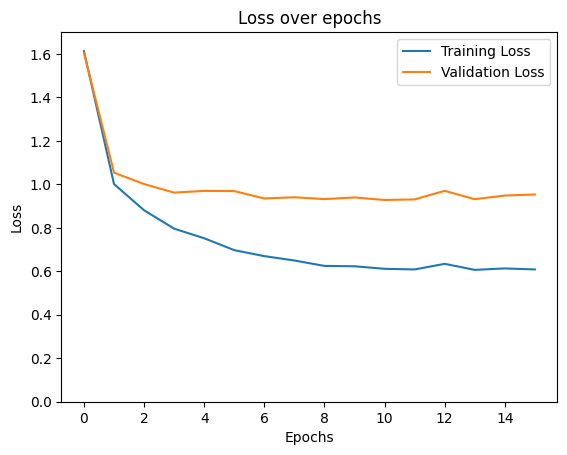

In [31]:
# Plot cross-validation loss curves
plt.plot(train_losses, label = "Training Loss")
plt.plot(valid_losses, label = "Validation Loss")
# Limit the axis for a better visualization
plt.ylim([0, 1.7])
# Add titles and legend
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

**Task 2.5.19:** Complete the code below to plot train and validation accuracies. You can follow what we did above for plotting train and validation losses.

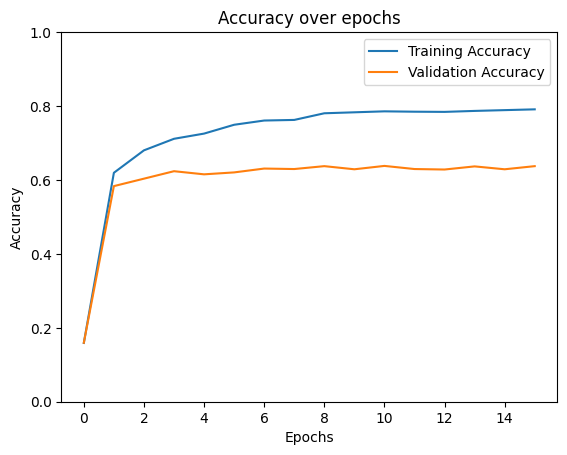

In [32]:
# Accuracy cross - validation curves 
# Plot train accuracies, use label = "Training Accuracy"
plt.plot(train_accuracies, label = "Training Accuracy")
# Plot validation accuracies, use label = "Validation Accuracy"
plt.plot(valid_accuracies, label = "Validation Accuracy")
# Limit the axis for a better visualization
plt.ylim([0, 1])
# Add titles and legend
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

From the learning curve we see that overall training loss decreases and accuracy increases. Validation loss does not seem to improve that much beyond the first couple of epochs.

Let's also inspect how the learning rate was changing during training due to the fact that we used a Learning Rate Scheduling Callback.

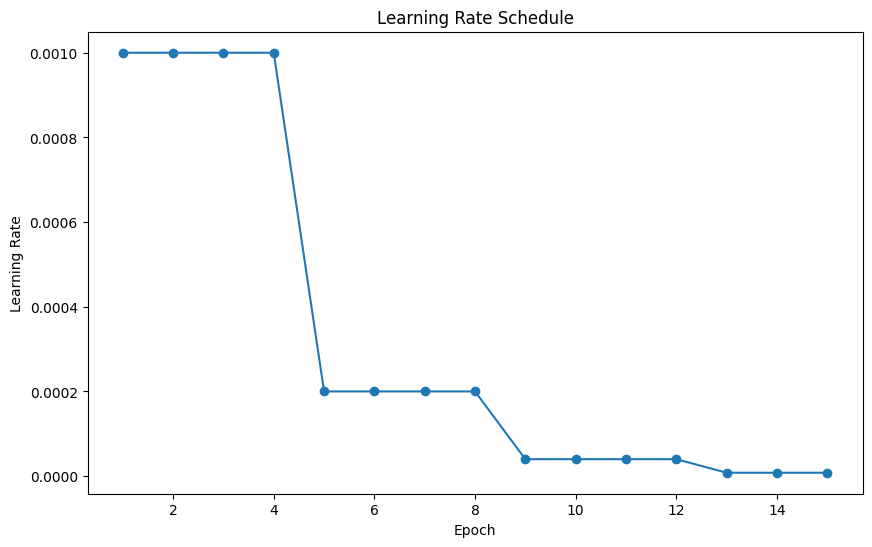

In [33]:
# Plot the learning rates
plt.figure(figsize = (10, 6)) # set figure
plt.plot(range(1, epochs + 1), learning_rates,
         marker = "o", label = "Learning Rate") # learning plotting rates
# Add titles and legend
plt.title("Learning Rate Schedule")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.show()

As expected, the learning rate decreases as our training progresses.

Now it's time load the best model that we saved with checkpointing!

In [34]:
# Load model saved
checkpoint = torch.load("model/LR_model.pth")

# Load the state dictionaries
model.load_state_dict(checkpoint["model_state_dict"])
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])

Let's compute the confusion matrix for our model using the validation data, like we did in previous lessons.

We'll obtain the probabilities that our model predicts by using the `predict` function from `training.py`. This function expects the model, the loader and the device as input arguments.

**Task 2.5.20:** Use the `predict` function from `training.py` to compute probabilities that our model predicts on the validation data. Then use `torch.argmax` and take these probabilities to compute the predicted classes.

In [35]:
# import function for making prediction
from training import predict

# Make soft predictions
probabilities_val = predict(model, val_loader, device)
# Make hard predictions
predictions_val = torch.argmax(probabilities_val, dim = 1)

# print predictions
print(predictions_val)

Predicting:   0%|          | 0/48 [00:00<?, ?it/s]

tensor([3, 4, 4,  ..., 4, 0, 3], device='cuda:0')


Now we'll get the target values and compute the confusion matrix. Again, same as we've done before.

Get Labels: 100%|██████████| 48/48 [00:21<00:00,  2.24it/s]


<Figure size 1000x800 with 0 Axes>

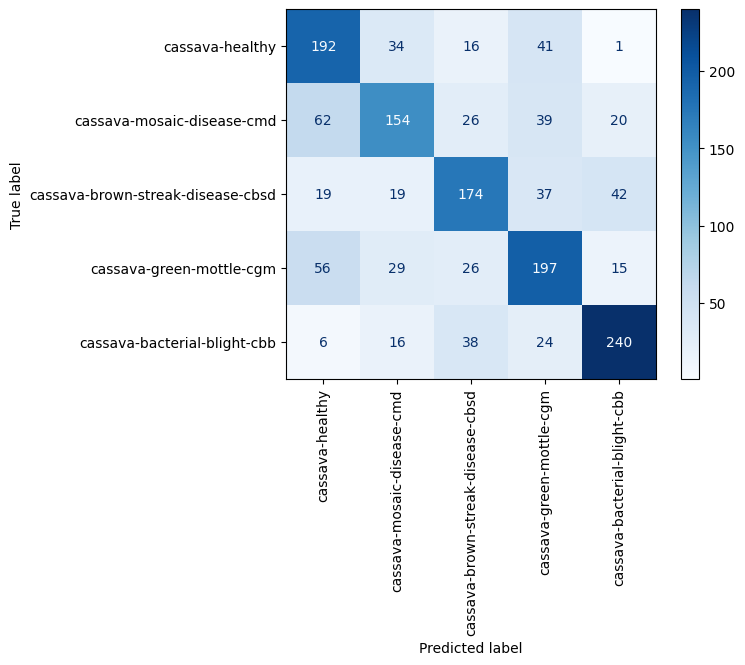

In [36]:
# Get true labels
targets_val = torch.cat([labels for _, labels in tqdm(val_loader, desc = "Get Labels")])
# Create a confusion matrix
cm = confusion_matrix(targets_val.cpu(), predictions_val.cpu())
# Build a display for the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)

# Set figure size
plt.figure(figsize = (10, 8))
# Plot the confusion matrix
disp.plot(cmap = plt.cm.Blues, xticks_rotation = "vertical");

Well done, looks good! We're ready to use this model on our test set and prepare a CSV file that we can submit to the competition.

### Submission to Competition

The competition submission should contain predicted probabilities for each of the $5$ classes on a test set. So we'll need to run each test image through our model.

Let's first find the test images. They are located in the `test` subdirectory within the `data_p2` directory.

**Task 2.5.21:** Assign `test_dir` the path to the test data using `os.path.join`.

In [37]:
# Set test data directory path
test_dir = os.path.join("data_p2/", "test")

print(test_dir)

data_p2/test


The competition requires us to save the model predictions as a CSV file. The first column should be called ID and contains the image filename. The rest of the columns should be labeled by the class name.

In order to get predicted probabilities of our model, we'll create a function `file_to_confidence` which is similar to what we created for this purpose in Project 1. The function makes model predictions on a single image. The steps in the function are:
- Open the image.
- Apply our transformation pipeline to the image as our model expects.
- Use `unsqueeze` to change the image tensor to 4D ($1$ x $3$ x $224$ x $224$) as our model is expecting a batch of images.
- Place image on device we're using.
- Make prediction and pass it through a `SoftMax` to get probabilities (numbers between $0$ and $1$, that sum to $1$).
- Convert result to a DataFrame

In [38]:
# Push model to device
model.to(device)

# Function to make predictions on a test image
def file_to_confidence(model, datadir, filename, transform_pipeline):
    # Get the image file path
    file_path = os.path.join(datadir, filename)
    # Load the image
    image = PIL.Image.open(file_path)
    # Apply transformations to the image for our model
    transformed = transform_pipeline(image)
    # Get a batch of one image
    unsqueezed = transformed.unsqueeze(0)
    # Push the image to our device
    image_cuda = unsqueezed.to(device)

    # Set the model into the evaluation mode (for it to be faster)
    model.eval()

    # Disable gradient calculations (so it gets faster)
    with torch.no_grad():
        # Get our model output on the image
        model_raw = model(image_cuda)
        # Get soft predictions for the image
        confidence = torch.nn.functional.softmax(model_raw, dim = 1)

    # Format predictions as a data-frame
    conf_df = pd.DataFrame([[filename] + confidence.tolist()[0]])
    # Set image ID and classes as column names
    conf_df.columns = ["ID"] + train_dataset.dataset.classes

    # return data-frame of predictions
    return conf_df

Just to make sure this is working, let's call this function on a training image from the cassava mosaic disease class for example.

In [39]:
# Mosaic train data
mosaic_train_dir = os.path.join("data_p2", "train", "cassava-mosaic-disease-cmd")
# List of mosaic train image names
mosaic_images = os.listdir(mosaic_train_dir)

# Make predictions on an image
file_to_confidence(model, mosaic_train_dir, mosaic_images[0], transform_normalized)

,ID,cassava-bacterial-blight-cbb,cassava-brown-streak-disease-cbsd,cassava-green-mottle-cgm,cassava-healthy,cassava-mosaic-disease-cmd
0,3598252026.jpg,0.006337,0.002547,0.24666,0.003644,0.740812


Looks alright! The largest predicted probability on this mosaic image is for the mosaic disease class.

Let's try one more.

In [40]:
# Make predictions on another image
file_to_confidence(model, mosaic_train_dir, mosaic_images[1], transform_normalized)

,ID,cassava-bacterial-blight-cbb,cassava-brown-streak-disease-cbsd,cassava-green-mottle-cgm,cassava-healthy,cassava-mosaic-disease-cmd
0,3709699332.jpg,0.007774,0.010343,0.305789,0.002626,0.673468


Everything seems in order. Now let's use `file_to_confidence` function on each test image to get the predictions for the competition submission. We can loop over the filenames and build up a list of DataFrames.

**Task 2.5.22:** Fill in the missing code below and use `pd.concat` to assemble the list of DataFrames `small_dfs` into one big DataFrame.

In [41]:
# Initialize list of predictions data-frames
small_dfs = []

# For each file in the test directory
for filename in tqdm(os.listdir(test_dir), desc = "Predicting on test set"):
    # Store its predictions
    small_dfs.append(
        file_to_confidence(model, test_dir, filename, transform_normalized)
    )

# Get all the predictions together
confidence_df = pd.concat(small_dfs)
# Sort predictions data-frame and reset indexes
confidence_df = confidence_df.sort_values("ID").reset_index(drop = True)
confidence_df.head()

Predicting on test set: 100%|██████████| 150/150 [00:04<00:00, 31.59it/s]


,ID,cassava-bacterial-blight-cbb,cassava-brown-streak-disease-cbsd,cassava-green-mottle-cgm,cassava-healthy,cassava-mosaic-disease-cmd
0,001.jpg,0.009724,0.144927,0.822893,0.010127,0.012329
1,002.jpg,0.760450,0.140843,0.010211,0.083965,0.004532
2,003.jpg,0.464406,0.021552,0.004141,0.509798,0.000104
3,004.jpg,0.031210,0.040186,0.510423,0.111442,0.306739
4,005.jpg,0.016647,0.020574,0.576115,0.348286,0.038378


Finally, save the dataframe as a CSV in `submission.csv`.

In [42]:
# Save submission file
confidence_df.to_csv("submission.csv", index = False)

### Conclusion

Great! 🎉 We accomplished a lot in this notebook. Here are the key takeaways:

- We used Transfer Learning to take a large existing model and specialize it to our competition.
- We trained that model with the balanced dataset we created in an earlier lesson.
- We implemented Callbacks using additional code in the training loop.
- The Callbacks we implemented were: Learning Rate Scheduling, Checkpointing, and Early Stopping.
- By reformatting the predictions of the model on the test set, we obtained a CSV file for competition submission.


---
This file &#169; 2024 by [WorldQuant University](https://www.wqu.edu/) is licensed under [CC BY-NC-ND 4.0](https://creativecommons.org/licenses/by-nc-nd/4.0/).